In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('/Users/ecuerbo/python/pyprac/data/coffee.csv')

In [80]:
df.columns

Index(['Unnamed: 0', 'total_cup_points', 'species', 'owner',
       'country_of_origin', 'farm_name', 'lot_number', 'mill', 'ico_number',
       'company', 'altitude', 'region', 'producer', 'number_of_bags',
       'bag_weight', 'in_country_partner', 'harvest_year', 'grading_date',
       'owner_1', 'variety', 'processing_method', 'aroma', 'flavor',
       'aftertaste', 'acidity', 'body', 'balance', 'uniformity', 'clean_cup',
       'sweetness', 'cupper_points', 'moisture', 'category_one_defects',
       'quakers', 'color', 'category_two_defects', 'expiration',
       'certification_body', 'certification_address', 'certification_contact',
       'unit_of_measurement', 'altitude_low_meters', 'altitude_high_meters',
       'altitude_mean_meters'],
      dtype='object')

In [81]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [82]:
df.describe()

,total_cup_points,number_of_bags,aroma,flavor,aftertaste,acidity,body,balance,uniformity,clean_cup,sweetness,cupper_points,moisture,category_one_defects,quakers,category_two_defects,altitude_low_meters,altitude_high_meters,altitude_mean_meters
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1337.000000,1338.000000,1108.000000,1108.000000,1108.000000
mean,82.151203,154.092676,7.572362,7.526046,7.406614,7.541338,7.523117,7.523632,9.842227,9.842459,9.864058,7.508984,0.088356,0.479821,0.173523,3.557549,1751.029843,1799.708197,1775.369020
std,2.686862,129.993747,0.315916,0.341382,0.350304,0.319173,0.307815,0.353630,0.485183,0.715296,0.554207,0.426843,0.048298,2.550603,0.832419,5.314357,8673.348986,8672.712024,8672.533233
min,59.830000,0.000000,5.080000,6.080000,6.170000,5.250000,5.080000,5.250000,6.000000,0.000000,1.330000,5.170000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,81.102500,14.000000,7.420000,7.330000,7.250000,7.330000,7.330000,7.330000,10.000000,10.000000,10.000000,7.250000,0.090000,0.000000,0.000000,0.000000,1100.000000,1100.000000,1100.000000
50%,82.500000,172.500000,7.580000,7.580000,7.420000,7.580000,7.500000,7.500000,10.000000,10.000000,10.000000,7.500000,0.110000,0.000000,0.000000,2.000000,1310.640000,1350.000000,1310.640000
75%,83.670000,275.000000,7.750000,7.750000,7.580000,7.750000,7.670000,7.750000,10.000000,10.000000,10.000000,7.750000,0.120000,0.000000,0.000000,4.000000,1600.000000,1650.000000,1600.000000
max,90.580000,1062.000000,8.750000,8.830000,8.670000,8.750000,8.580000,8.750000,10.000000,10.000000,10.000000,10.000000,0.280000,63.000000,11.000000,55.000000,190164.000000,190164.000000,190164.000000


In [83]:
df.var()

total_cup_points        7.219230e+00
number_of_bags          1.689837e+04
aroma                   9.980265e-02
flavor                  1.165419e-01
aftertaste              1.227131e-01
acidity                 1.018711e-01
body                    9.474982e-02
balance                 1.250540e-01
uniformity              2.354021e-01
clean_cup               5.116477e-01
sweetness               3.071453e-01
cupper_points           1.821949e-01
moisture                2.332672e-03
category_one_defects    6.505576e+00
quakers                 6.929212e-01
category_two_defects    2.824239e+01
altitude_low_meters     7.522698e+07
altitude_high_meters    7.521593e+07
altitude_mean_meters    7.521283e+07
dtype: float64

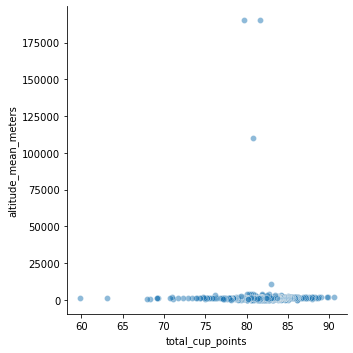

In [76]:
# high variation on the altitudes
sns.relplot(x='total_cup_points',y='altitude_mean_meters', data=df, kind='scatter',alpha=0.5);

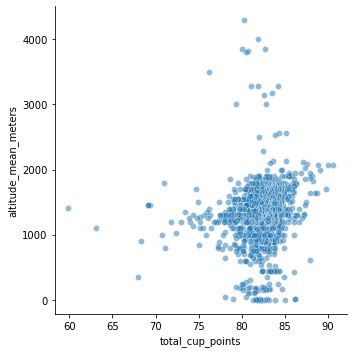

In [84]:
#outlying altitudes must have been in km. must be divided by 1000
'''low_alt_km=df.loc[df['altitude_low_meters']>10000, 'altitude_low_meters']
mean_alt_km=df.loc[df['altitude_mean_meters']>10000, 'altitude_mean_meters']
high_alt_km=df.loc[df['altitude_high_meters']>10000, 'altitude_high_meters']
low_alt_m = low_alt_km/1000
mean_alt_m = low_alt_km/1000
high_alt_m = high_alt_km/1000
df.loc[df['altitude_low_meters']>10000, 'altitude_low_meters'] = low_alt_m
df.loc[df['altitude_mean_meters']>10000, 'altitude_mean_meters'] = mean_alt_m
df.loc[df['altitude_high_meters']>10000, 'altitude_high_meters'] = mean_alt_m'''
#a shorter code
alts = ['altitude_mean_meters','altitude_low_meters','altitude_high_meters']
for alt in alts:
    km = df.loc[df[alt]>10000, alt]
    m = km/1000
    df.loc[df[alt]>10000, alt] = m
    
sns.relplot(x='total_cup_points',y='altitude_mean_meters', data=df, kind='scatter',alpha=0.5);

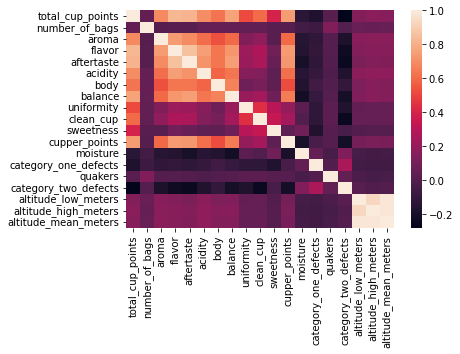

In [90]:
sns.heatmap(df.corr());

In [116]:
fl=[]
for x in df.columns:
    if df[x].dtype=='float':
        fl.append(x)

In [94]:
df['altitude_range'] = df['altitude_high_meters'] - df['altitude_low_meters']

In [115]:
df[df['altitude_range']>500]

,total_cup_points,species,owner,country_of_origin,farm_name,lot_number,mill,ico_number,company,altitude,...,category_two_defects,expiration,certification_body,certification_address,certification_contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters,altitude_range
16,87.42,Arabica,grounds for health admin,Indonesia,toarco jaya,NaN,NaN,NaN,NaN,1200-1800m,...,0.0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1200.00,1800.00,1500.00,600.00
47,86.00,Arabica,lusso lab,Colombia,ecobio colombia,NaN,NaN,NONE,lusso coffee lab,900-1500m,...,1.0,"March 20th, 2015",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,900.00,1500.00,1200.00,600.00
48,86.00,Arabica,lusso lab,Kenya,kianjavi,NaN,NaN,NONE,lusso coffee lab,1520m-2200m,...,1.0,"February 6th, 2015",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1520.00,2200.00,1860.00,680.00
105,85.00,Arabica,carl walker,Guatemala,la igualdad,NaN,concepcion,11-194-0014,NaN,3500-5200 feet,...,1.0,"September 7th, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,ft,1066.80,1584.96,1325.88,518.16
189,84.33,Arabica,benjamin schmerler,Ethiopia,NaN,NaN,NaN,NaN,NaN,3600-6200 ft,...,1.0,"June 13th, 2012",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,ft,1097.28,1889.76,1493.52,792.48
527,83.00,Arabica,racafe & cia s.c.a,Colombia,NaN,NaN,popayán,3-37,NaN,1050 - 1850 msnm,...,1.0,"May 11th, 2012",Almacafé,e493c36c2d076bf273064f7ac23ad562af257a25,70d3c0c26f89e00fdae6fb39ff54f0d2eb1c38ab,m,1050.00,1850.00,1450.00,800.00
557,82.92,Arabica,racafe & cia s.c.a,Colombia,NaN,NaN,NaN,3-37-2759,NaN,1050 - 1850 msnm,...,0.0,"July 18th, 2012",Almacafé,e493c36c2d076bf273064f7ac23ad562af257a25,70d3c0c26f89e00fdae6fb39ff54f0d2eb1c38ab,m,1050.00,1850.00,1450.00,800.00
567,82.83,Arabica,essencecoffee,Colombia,NaN,NaN,NaN,3015388,essence coffee,1200-2000m,...,1.0,"March 20th, 2016",Blossom Valley International,fc45352eee499d8470cf94c9827922fb745bf815,de73fc9412358b523d3a641501e542f31d2668b0,m,1200.00,2000.00,1600.00,800.00
628,82.67,Arabica,george a. fernandez,Colombia,la canada,NaN,the beneficio is designed to be ecologic,2889,NaN,1800 meters (5900,...,0.0,"November 15th, 2012",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1800.00,5900.00,3850.00,4100.00
878,81.67,Arabica,dae ltd company,"Tanzania, United Republic Of",multiple,NaN,dae ltd,C001,dae ltd company,1200-1800m,...,0.0,"January 2nd, 2016",Africa Fine Coffee Association,073285c0d45e2f5539012d969937e529564fa6fe,c4ab13415cdd69376a93780c0166e7b1a10481ea,m,1200.00,1800.00,1500.00,600.00


ValueError: Data must be 1-dimensional

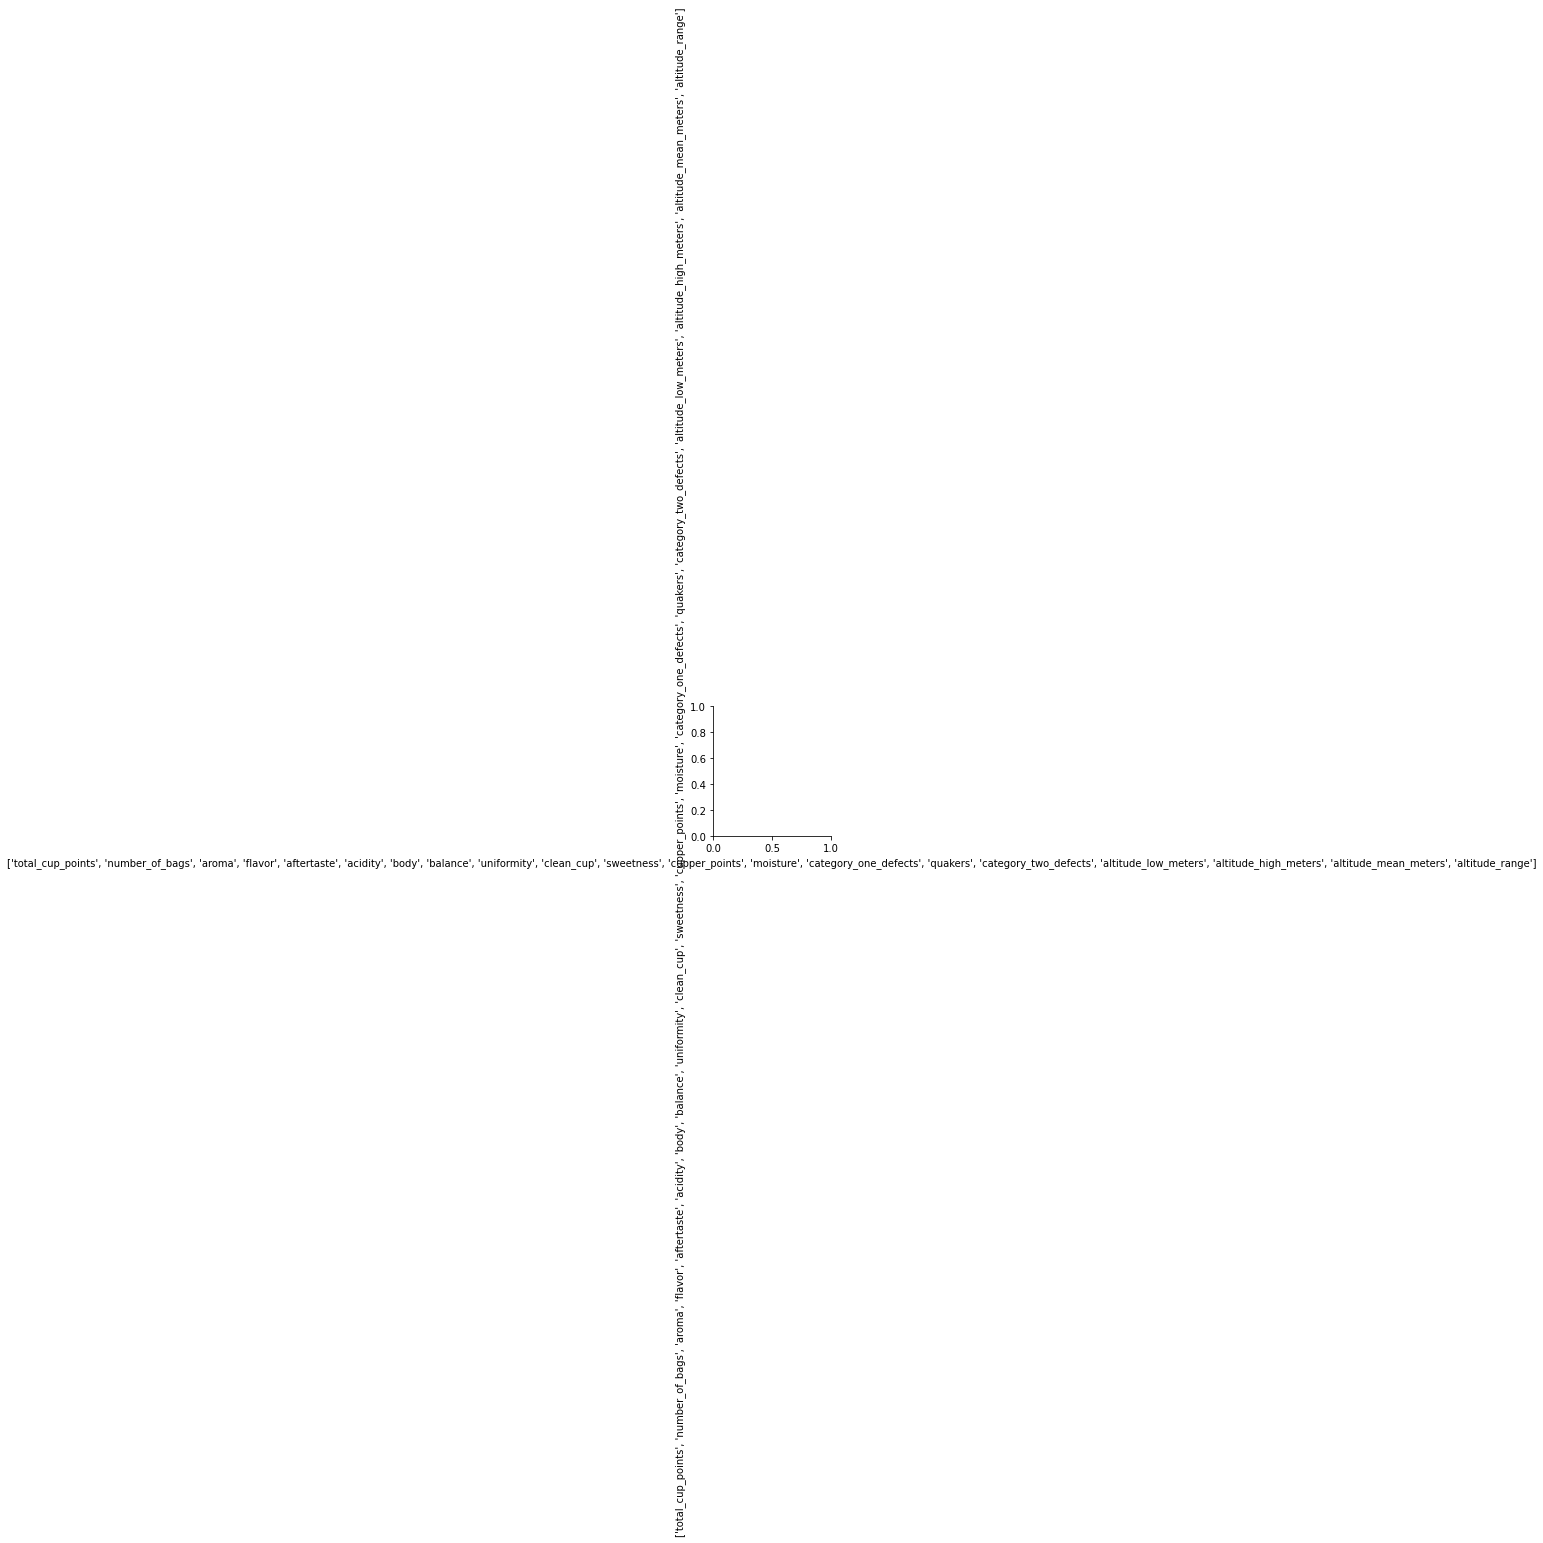

In [118]:
sns.pairplot(df.query("altitude_range>0"),
            vars=[fl],
            hue="species", palette='husl',plot_kws={"alpha":0.5});

In [117]:
df.dtypes

total_cup_points         float64
species                   object
owner                     object
country_of_origin         object
farm_name                 object
lot_number                object
mill                      object
ico_number                object
company                   object
altitude                  object
region                    object
producer                  object
number_of_bags           float64
bag_weight                object
in_country_partner        object
harvest_year              object
grading_date              object
owner_1                   object
variety                   object
processing_method         object
aroma                    float64
flavor                   float64
aftertaste               float64
acidity                  float64
body                     float64
balance                  float64
uniformity               float64
clean_cup                float64
sweetness                float64
cupper_points            float64
moisture  